<a href="https://colab.research.google.com/github/beserk561/notes_collab/blob/main/Alexnet_Math_Data_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Alexnet

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
model = alexnet(pretrained=True).to(device)
model.eval();

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:00<00:00, 254MB/s]


# Load Images

In [ ]:
url = "https://docs.google.com/presentation/d/1WVE287B4LBI3dZOvofhCrzpc8pP8PWHan8WUhLB9swA/edit#slide=id.g206f8279a60_0_0"

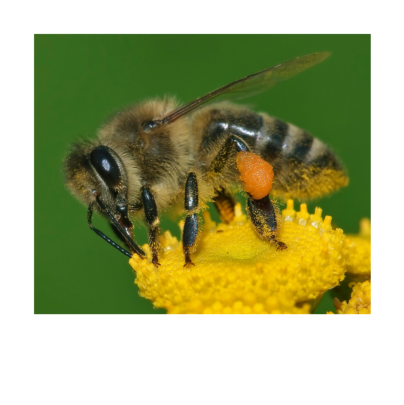

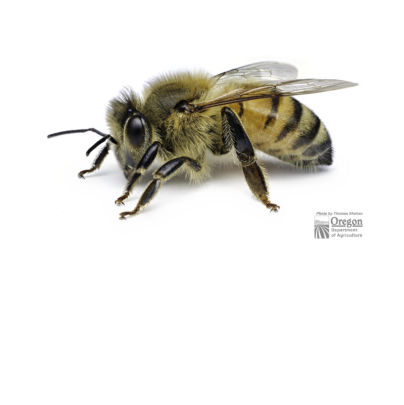

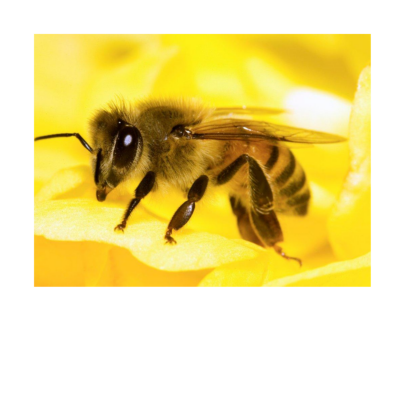

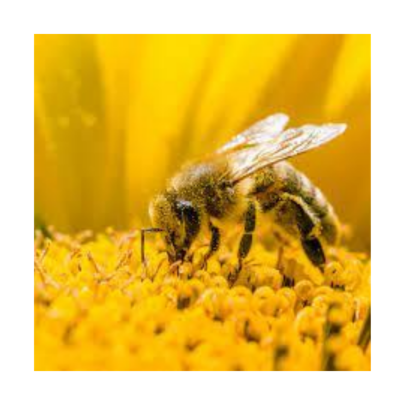

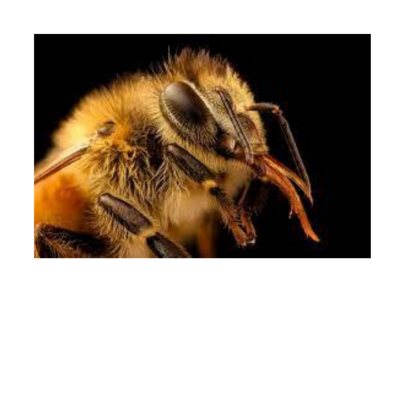

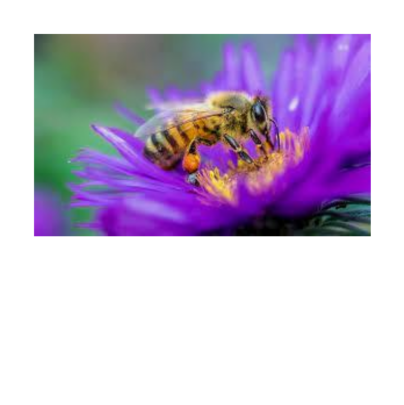

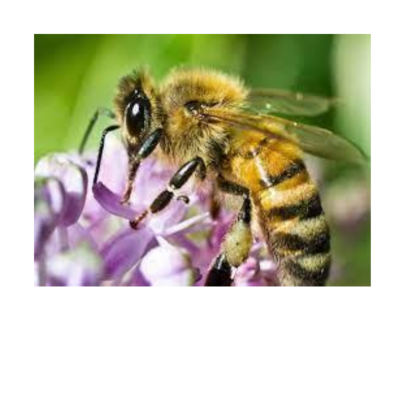

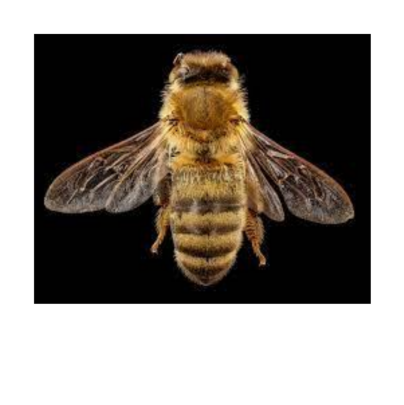

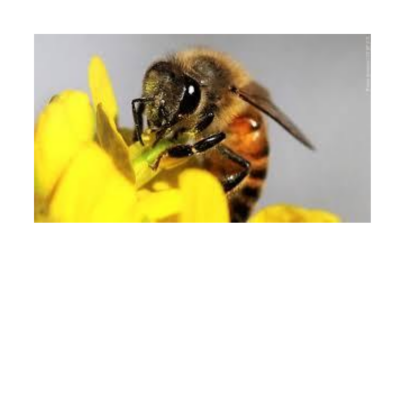

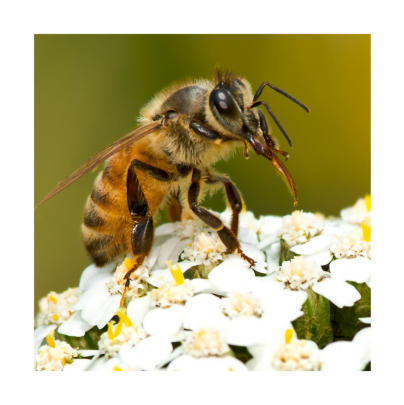

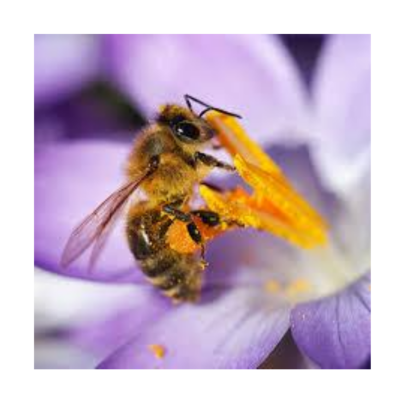

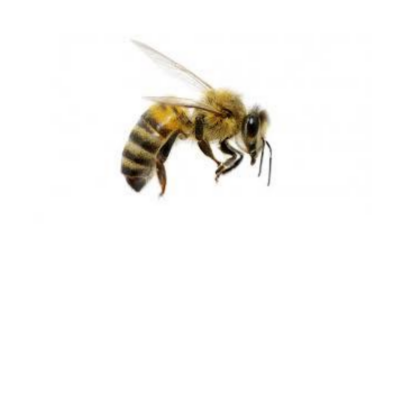

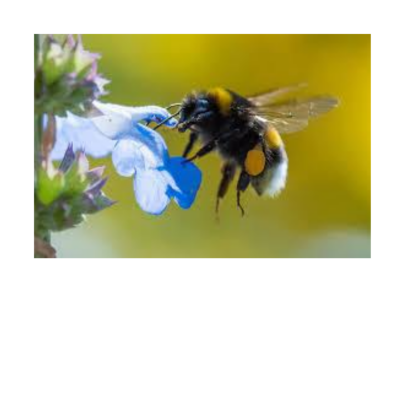

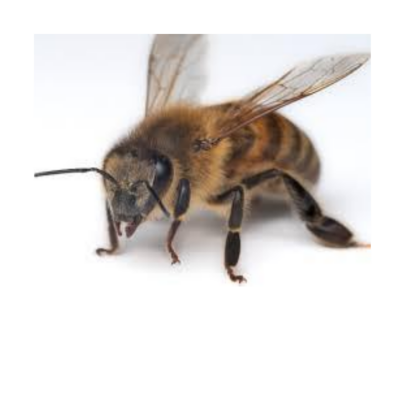

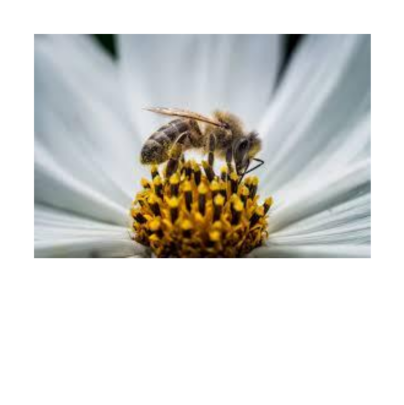

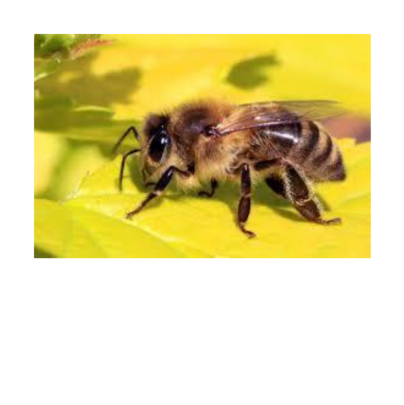

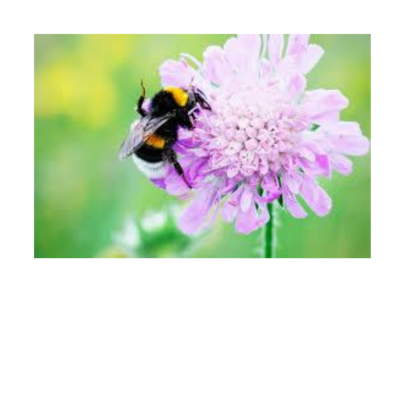

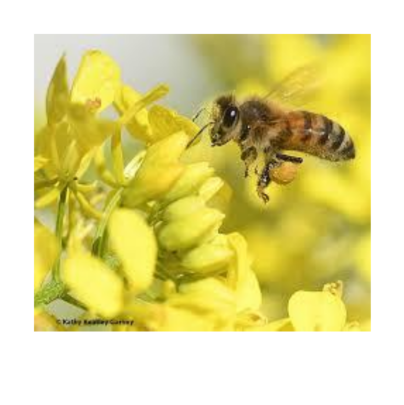

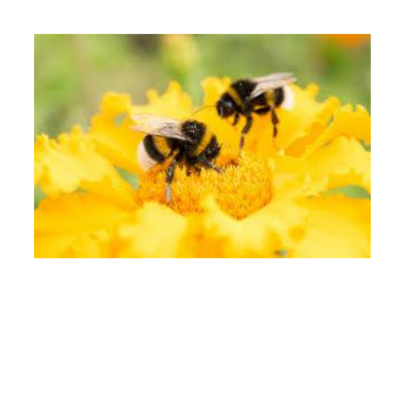

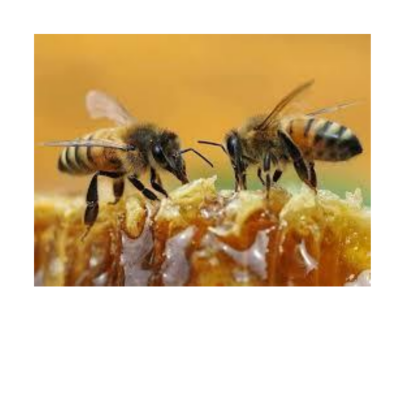

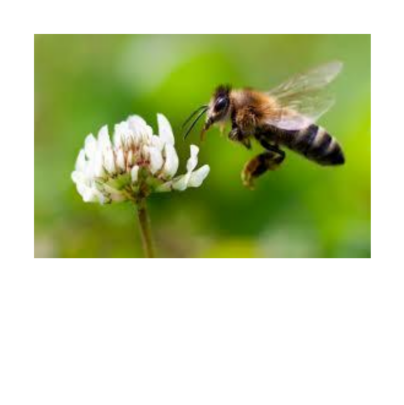

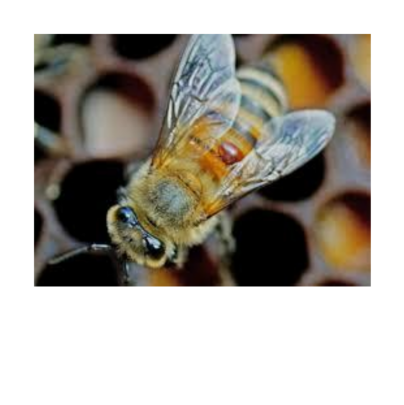

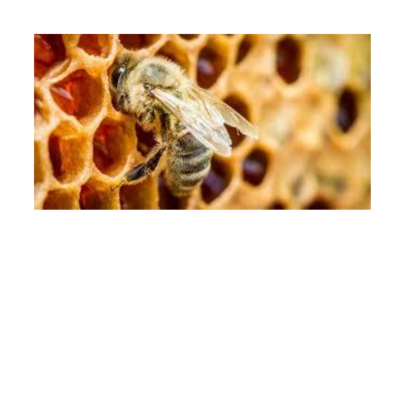

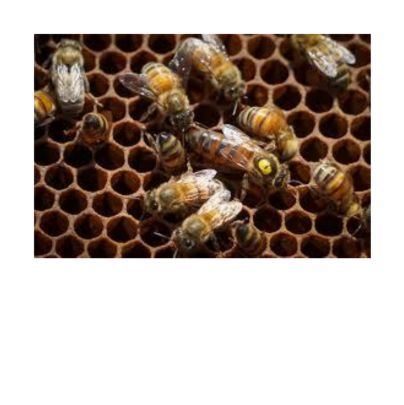

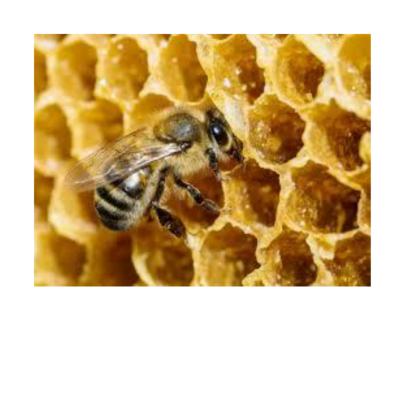

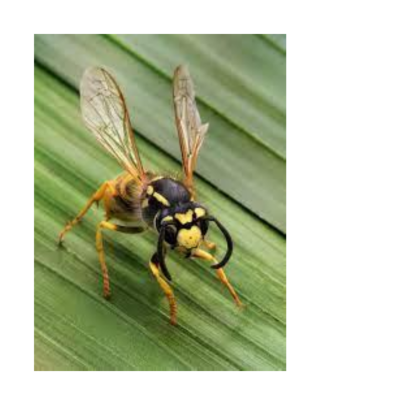

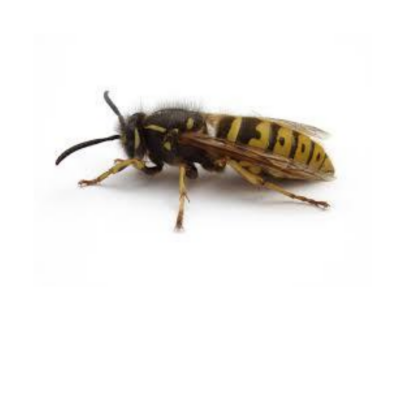

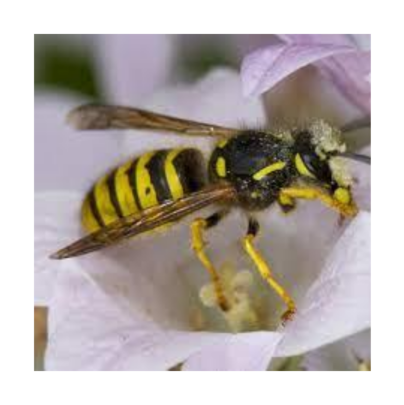

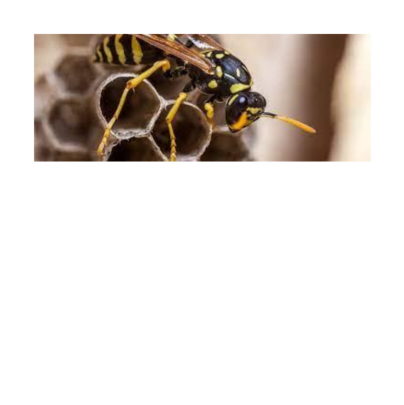

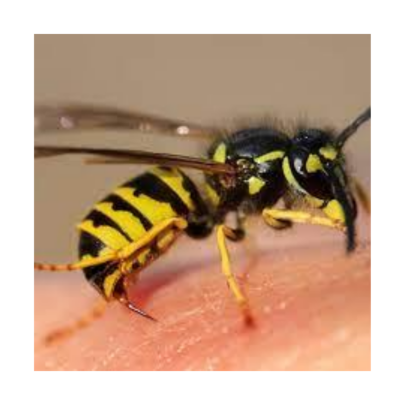

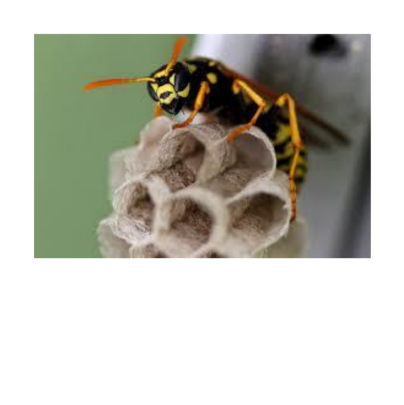

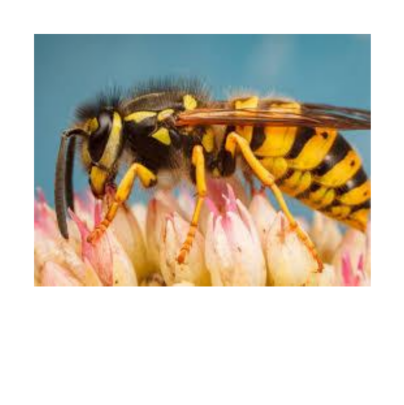

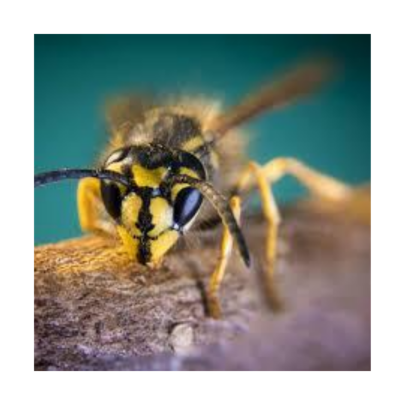

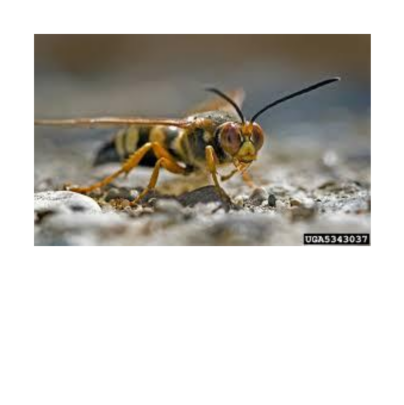

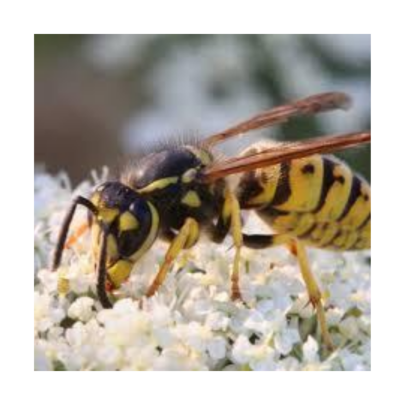

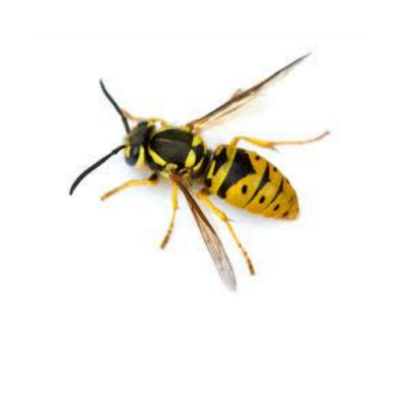

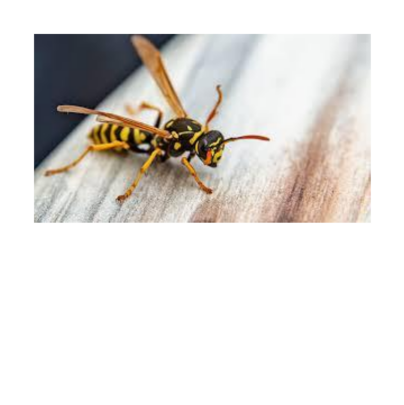

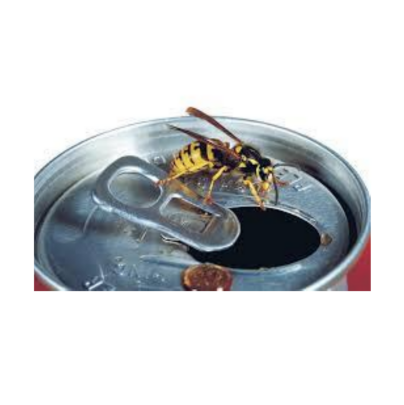

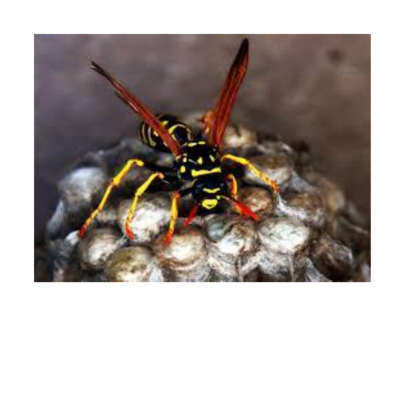

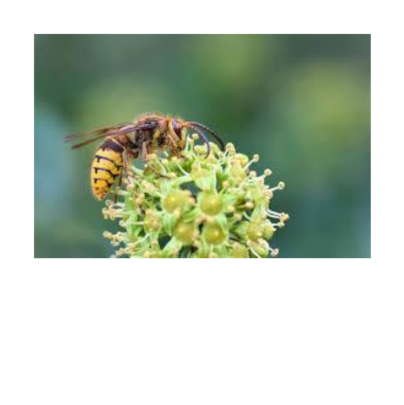

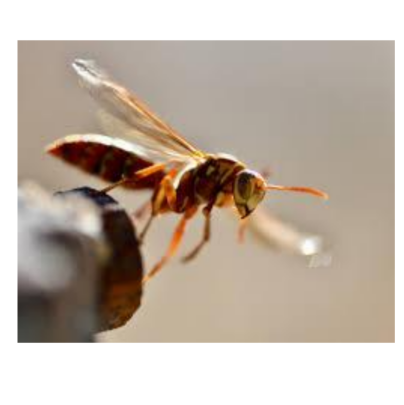

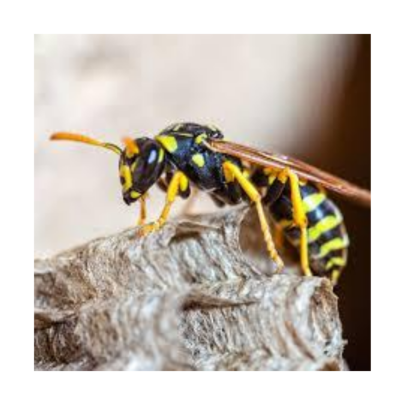

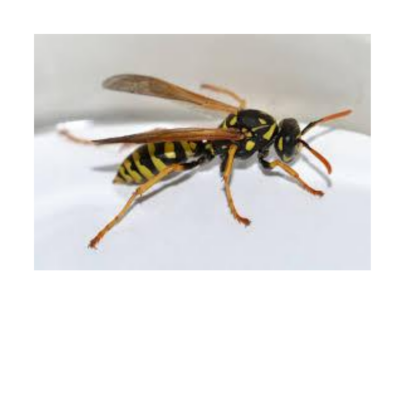

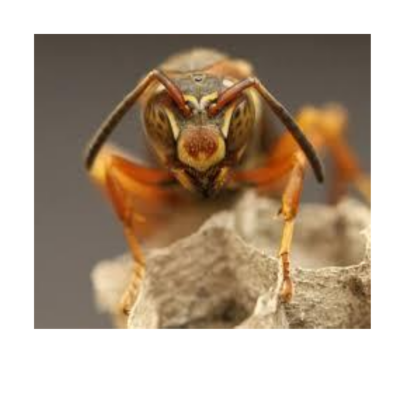

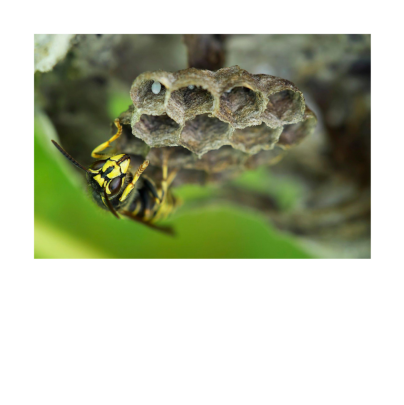

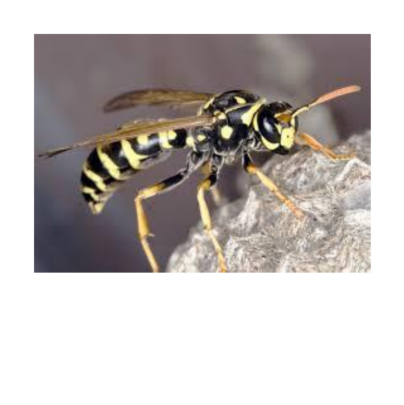

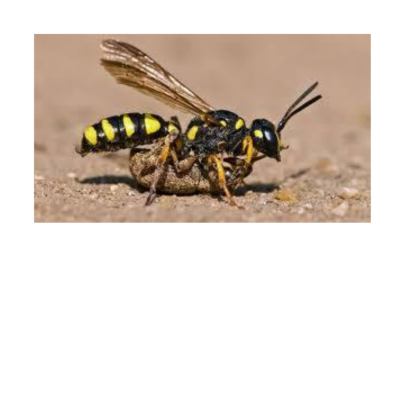

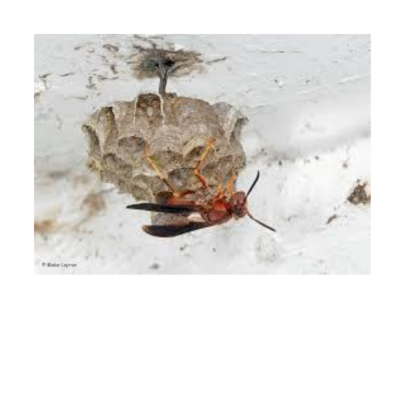

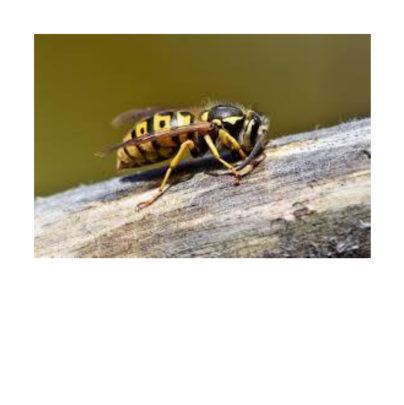

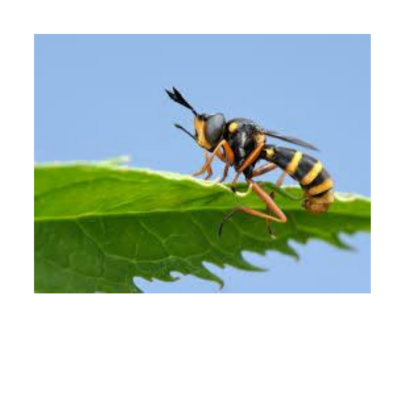

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

# Process Image

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
y_out = y.cpu().detach().numpy()

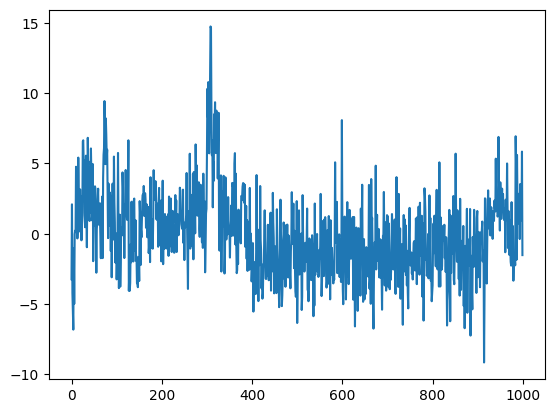

In [ ]:
plt.plot(y_out[0,:])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
guesses.shape

(50,)

In [ ]:
guesses

array([308, 309, 309, 309, 283, 584, 309,  12, 309, 309, 309, 308, 584,
       309, 599,  73, 301, 984, 301, 309, 301,  36, 599, 599, 599, 308,
        79,  38, 584,  38, 599, 934, 308, 308, 303, 312, 312, 770, 599,
       301, 310, 318,  73, 308, 599, 599,  72,  73, 308, 308])

In [ ]:
for j,i in enumerate(list(guesses)):
    print(j,i,labels[i])

0 308 fly
1 309 bee
2 309 bee
3 309 bee
4 283 Persian cat
5 584 hair slide
6 309 bee
7 12 house finch, linnet, Carpodacus mexicanus
8 309 bee
9 309 bee
10 309 bee
11 308 fly
12 584 hair slide
13 309 bee
14 599 honeycomb
15 73 barn spider, Araneus cavaticus
16 301 ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
17 984 rapeseed
18 301 ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
19 309 bee
20 301 ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
21 36 terrapin
22 599 honeycomb
23 599 honeycomb
24 599 honeycomb
25 308 fly
26 79 centipede
27 38 banded gecko
28 584 hair slide
29 38 banded gecko
30 599 honeycomb
31 934 hotdog, hot dog, red hot
32 308 fly
33 308 fly
34 303 long-horned beetle, longicorn, longicorn beetle
35 312 cricket
36 312 cricket
37 770 running shoe
38 599 honeycomb
39 301 ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
40 310 ant, emmet, pismire
41 318 lacewing, lacewing fly
42 73 barn spider, Araneus cavaticus
43 308 fly
4

# Retrain

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(50, 1000)

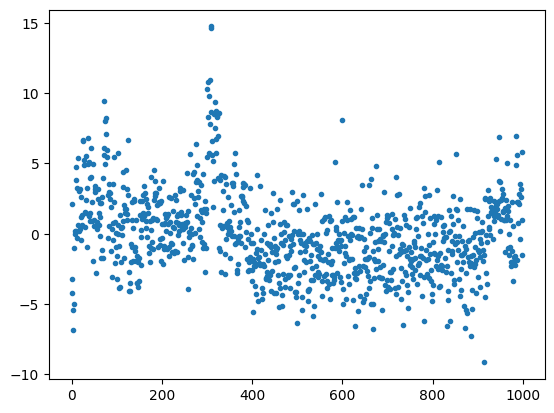

In [ ]:
plt.plot(X[0],'.')

In [ ]:
X[0]

array([-3.24099493e+00,  2.09106159e+00, -4.22622871e+00, -5.42965412e+00,
       -6.82928991e+00, -1.03126216e+00, -4.99656582e+00, -4.20163870e-02,
        2.13194251e-01,  1.69713661e-01,  4.76627254e+00,  3.79528427e+00,
        3.24673223e+00, -3.36890221e-01,  6.13849998e-01,  5.41791534e+00,
        3.06117272e+00,  1.62443578e-01,  3.30121934e-01,  3.15639544e+00,
        1.15647936e+00,  2.64567041e+00, -4.70813990e-01,  5.86437941e-01,
        1.30187678e+00,  6.57001638e+00,  6.65172768e+00,  4.88070250e+00,
        5.23940277e+00,  1.51584411e+00,  4.59872007e-01,  2.40217519e+00,
        5.55505133e+00,  1.47338343e+00, -9.63006854e-01,  3.23344421e+00,
        6.82805347e+00,  4.94803524e+00,  5.13378716e+00,  1.23728752e+00,
        9.06320691e-01,  3.96517873e+00,  1.48377752e+00,  6.06976652e+00,
        4.04868507e+00,  2.28855324e+00,  9.38722670e-01,  4.96288300e+00,
       -1.95540953e+00,  9.67804134e-01,  5.52761436e-01,  2.95080853e+00,
        3.37225914e+00,  

In [ ]:
np.argmax(X[0])

308

In [ ]:
index_winner = np.argmax(X[0])

labels[index_winner]

'fly'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

fly
bee
weevil
long-horned beetle, longicorn, longicorn beetle
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
leaf beetle, chrysomelid
barn spider, Araneus cavaticus
lacewing, lacewing fly
admiral
ant, emmet, pismire


In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  3.,  44., 196., 341., 272.,  93.,  32.,  14.,   3.,   2.]),
 array([-9.1684227 , -6.776196  , -4.38396931, -1.99174261,  0.40048409,
         2.79271078,  5.18493748,  7.57716417,  9.96939087, 12.36161804,
        14.75384426]),
 <BarContainer object of 10 artists>)

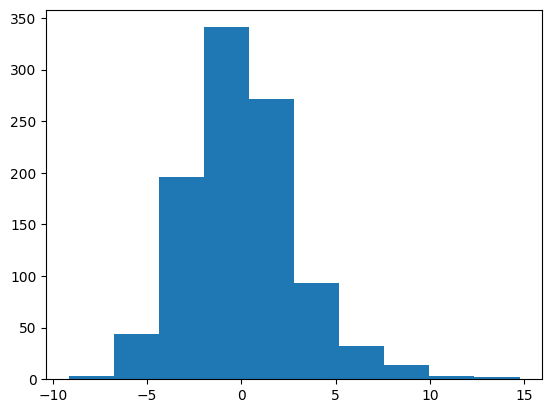

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
!nvidia-smi

Fri Mar 31 18:56:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    27W /  70W |   1773MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
Y.shape

torch.Size([50])

In [ ]:
a = np.array([[1, 2], [3, 4]])

In [ ]:
b = np.array([[5, 6], [1, 0]])

In [ ]:
a.shape,b.shape

((2, 2), (2, 2))

In [ ]:
a@b

array([[ 7,  6],
       [19, 18]])

In [ ]:
def inner_prod(a,b):
    c = 0 
    for i in range(a.shape[0]):
        c += a[i]*b[i]
    return c

In [ ]:
def mat_mult(a,b):

    if a.shape[1] == b.shape[0]:

        c = np.zeros((a.shape[0],b.shape[1]))

        for i in range(a.shape[0]):
            for j in range(b.shape[1]):
               c[i,j] = inner_prod(a[i,:],b[:,j])
        return c
        
    else:
        print("error") 



In [ ]:
%%timeit
a@b

1.32 µs ± 262 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
mat_mult(a,b)

7.74 µs ± 166 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
x = np.random.random((1000,1))

In [ ]:
w = np.random.random((2,1000))

In [ ]:
w.shape,x.shape

((2, 1000), (1000, 1))

In [ ]:
z = mat_mult(w,x)

In [ ]:
z.shape

(2, 1)

In [ ]:
z

array([[250.23699272],
       [247.30450901]])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


https://tensorspace.org/